# Overview and Motivation: Provide an overview of the project goals and the motivation for it. Consider that this will be read by people who did not see your project proposal.

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Related Work: Anything that inspired you, such as a paper, a web site, or something we discussed in class.

# Initial Questions: What questions are you trying to answer? How did these questions evolve over the course of the project? What new questions did you consider in the course of your analysis? - Data: Source, scraping method, cleanup, storage, etc.

Initially we were interested in looking at changes in housing prices across the US from 2000 to 2010, and how differences in demographic and business features between regions might be able to predict the change in housing prices. Our first decision was to decide the granularity of our data in terms of geographic divisions. We chose to perform our analysis at the zipcode level in order to maximize the sample size for our regression and to eliminate the intra-region heterogeneity that exist with larger geographies.  We initially retrieved zipcode-level data for median sale price ber square foot data for zipcodes across the united state from Zillow, a real estate database company. For our predictors, we aggregated data from a variety of sources. Initially, we used 2010 census data which detailed zipcode-level demographic data. As we iterated through various regression models, we sought to improve our models by adding new predictors to our regression. We aggregated jail data, median income data, from Yelp, ---. We also built a python script that would allow us to use features from Census data that only existed at the county level and mapped the values to the corresonding zipcodes within the county. We gathered our predictors and merged them with the housing price data by zipcode 

We first regressed census data along with jail/prison data on change in housing prices from 2000 to 2010. Our first model had very low explanatory power, so we sought more features. However, as we thought about the story we wanted to tell, we started thinking that examining other response variables might lend to more interesting and easily interpretable conclusions. We looked at a Zillow metric for home values that accounts for some biases that come with using their raw house price data. We also eventually looked at price-to-rent ratio. 

With regards to gathering and organizing our data, some of our data, like the 2010 census data and the Zillow real estate data, we were able to download tables that we converted to pandas and cleaned by dropping the NANs in the years we wished to analyze and other miscellenaeous modifications. We stored our pandas dataframes by pickling them. 


For Yelp we randomly sampled zipcodes, grabbed businesses in categories in active, arts, education, nightlife, pets, shopping, restaurants, took proportion of busineseses in each category to get businesses, transformed data, made binary indicator variables. 

# Exploratory Data Analysis: What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?

# First Pass: MedianSoldPriceperSqft regressed on 2010 Census Data

In [7]:
# Read in Zillow's MedianSoldPricePerSqft zipcode database 
zip_MSPPS = pd.read_csv('data/Zip_MedianSoldPricePerSqft_AllHomes.csv')
zip_MSPPS.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,62080,11368,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84630,60629,Chicago,IL,Chicago,Cook,2,83.3729,81.9039,86.2227,88.2281,92.4941,88.4356,84.2880,86.4587,87.2849,82.1885,84.3404,85.3516,83.9546,80.3261,80.8496,85.4139,87.8756,86.3272,86.9252,88.9441,84.8332,82.1182,82.8501,85.9554,85.4117,85.6305,90.6093,92.3588,95.8791,95.4600,97.4595,94.5612,91.3699,91.5263,90.7089,94.4271,92.9856,93.5025,95.1732,98.5480,97.9914,100.6991,101.1288,...,109.0509,100.4555,97.2719,95.8577,101.9246,106.3171,109.1850,115.7075,120.9565,124.7645,123.4396,118.7330,122.6573,106.9069,103.3210,102.9773,101.968100,108.3858,102.5008,111.5418,110.0932,103.3630,94.8442,99.4525,103.1513,123.4814,119.6632,125.0165,118.4917,112.127800,121.5239,120.1162,115.2933,103.542500,105.5923,121.6394,126.1742,125.6553,116.9917,113.1415,118.9884,107.6563,107.2762,109.5701,116.6246,111.9092,114.7804,127.931300,132.5965,131.3061
2,96193,90650,Norwalk,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles,3,117.3969,118.0225,113.3146,112.0347,114.1521,113.2268,111.2448,109.2356,112.6931,115.6738,115.9940,108.9467,113.3924,110.7738,108.5902,110.6241,113.3821,117.6624,114.2688,112.9188,114.2251,116.3165,111.2844,111.1042,112.2943,117.9401,117.9640,117.6704,117.3105,114.7438,115.1906,113.4917,119.0176,118.3696,119.5861,120.8136,122.6741,122.6501,123.3720,124.8398,125.4529,126.7413,127.6706,...,229.1417,235.6075,227.5498,219.8136,236.8887,234.3855,225.6425,229.9889,224.8353,227.7036,234.5118,234.7218,228.2131,221.8379,231.7794,230.8116,249.953400,258.6240,247.0731,248.9392,250.8335,266.6558,266.6535,268.9651,282.5015,287.1165,293.1764,281.2928,291.0114,282.929600,298.6052,289.6318,294.9153,300.241400,303.2769,291.9878,303.5781,314.2814,327.2802,317.2496,312.0753,297.1876,287.1131,305.2852,314.4935,339.6102,341.7029,339.365500,336.4867,343.4985
3,62037,11226,New York,NY,New York,Kings,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.330544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62093,11385,New York,NY,New York,Queens,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.102389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.941748,NaN,NaN


In [8]:
# We have over 10,000 Zipcodes
zip_MSPPS.shape

(10669, 242)

In [12]:
#Drop rows that have NAN values for the desired dates
zip_MSPPS_notNAN = zip_MSPPS.dropna(subset = ['2000-01','2001-01','1999-01','2010-01','2009-01','2011-01'])

#Cast Zipcodes as strings and add 0s to the beginning of the zipcodes 
#if they are less than 5 characters
zip_MSPPS_notNAN['RegionName'] = zip_MSPPS_notNAN['RegionName'].astype(str)
zip_MSPPS_notNAN.RegionName = [(5-len(zipcode))*'0' + zipcode if len(zipcode) < 5 else zipcode for zipcode in zip_MSPPS_notNAN.RegionName]

# Average January of 1999-2001 and 2009-2011, in order to reduce noise 
zip_MSPPS_notNAN['2000_agg'] = (zip_MSPPS_notNAN['2000-01'] + zip_MSPPS_notNAN['2001-01'] + zip_MSPPS_notNAN['1999-01'])/3
zip_MSPPS_notNAN['2010_agg'] = (zip_MSPPS_notNAN['2010-01'] + zip_MSPPS_notNAN['2011-01'] + zip_MSPPS_notNAN['2009-01'])/3

# pct_delta (our response variable) is ratio of these averages
zip_MSPPS_notNAN['pct_delta'] = zip_MSPPS_notNAN['2010_agg']/zip_MSPPS_notNAN['2000_agg']

/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hes/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.or

In [13]:
# We lose almost 8,000 zipcodes that had NANs for the desired dates
zip_MSPPS_notNAN.shape

(1678, 245)

(array([   9.,   17.,   45.,   84.,   99.,  172.,  164.,  140.,  138.,
          99.,   86.,   65.,   72.,   50.,   59.,   35.,   31.,   31.,
          28.,   23.,   29.,   25.,   20.,   17.,   16.,   20.,    9.,
           6.,    5.,    5.,    9.,    7.,    3.,   11.,    5.,    4.,
           6.,    3.,    4.,    3.,    1.,    0.,    3.,    2.,    0.,
           1.,    0.,    1.,    5.,    2.,    1.,    0.,    1.,    1.,
           1.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([   28.3158,    38.3158,    48.3158,    58.3158,    68.3158,
           78.3158,    88.3158,    

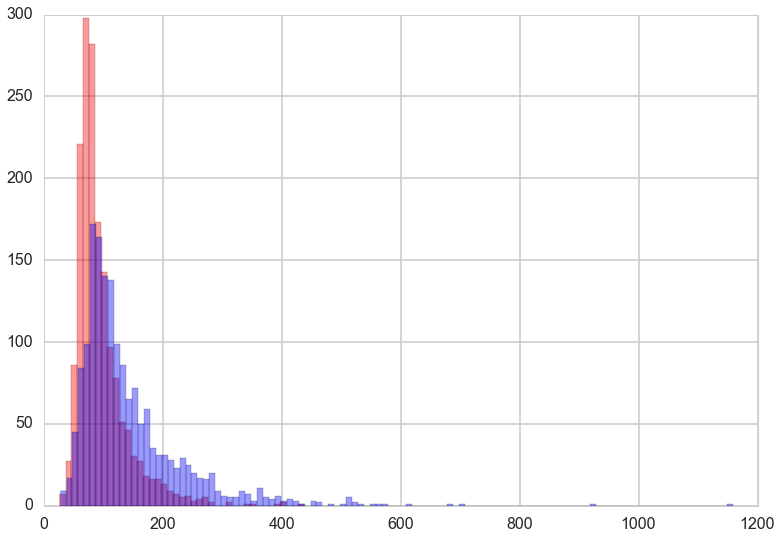

In [15]:
# Plot Jan 2000 and Jan 2010 histograms to get a sense for how prices changed in ten years
# We see that prices on the whole seemed to increase
plt.hist(zip_MSPPS_notNAN['2000-01'].values, bins=np.arange(min(zip_MSPPS_notNAN['2000-01'].values), max(zip_MSPPS_notNAN['2000-01'].values) + 10, 10), color = 'r', alpha = 0.4)
plt.hist(zip_MSPPS_notNAN['2010-01'].values, bins=np.arange(min(zip_MSPPS_notNAN['2010-01'].values), max(zip_MSPPS_notNAN['2010-01'].values) + 10, 10), color = 'b', alpha = 0.4)

(0, 1100)

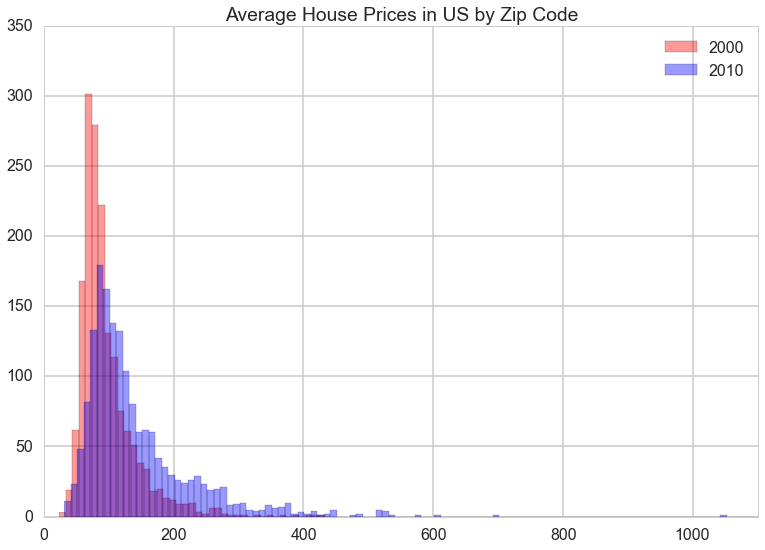

In [19]:
# Check to make sure that the average roughly 
plt.hist(zip_MSPPS_notNAN['2000_agg'].values, bins=np.arange(min(zip_MSPPS_notNAN['2000_agg'].values), max(zip_MSPPS_notNAN['2000_agg'].values) + 10, 10), color = 'r', alpha = 0.4, label = '2000')
plt.hist(zip_MSPPS_notNAN['2010_agg'].values, bins=np.arange(min(zip_MSPPS_notNAN['2010_agg'].values), max(zip_MSPPS_notNAN['2010_agg'].values) + 10, 10), color = 'b', alpha = 0.4, label = '2010')
plt.legend()
plt.title('Average House Prices in US by Zip Code')
plt.xlim(0,1100)

(0, 10)

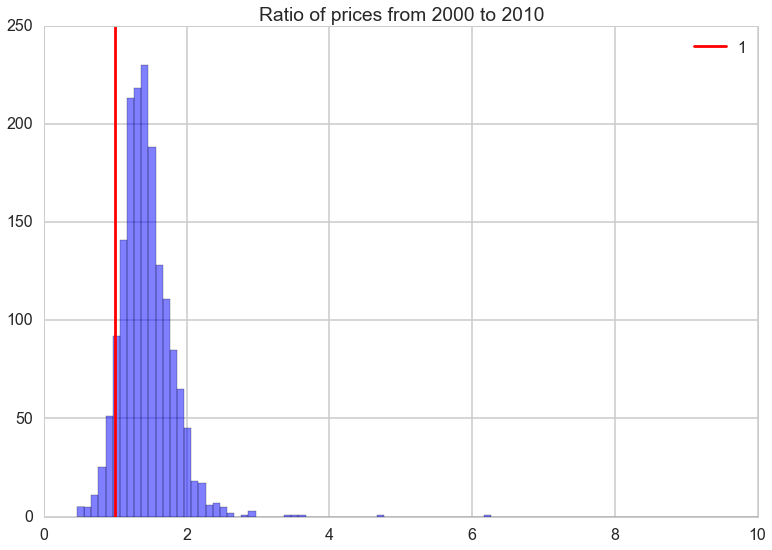

In [20]:
# Visualize ratio, it seems roughly normally distributed and most home prices increased
plt.hist(zip_MSPPS_notNAN['pct_delta'].values, bins=np.arange(min(zip_MSPPS_notNAN['pct_delta'].values), max(zip_MSPPS_notNAN['pct_delta'].values) + .1, .1), color = 'b', alpha = 0.5)
plt.axvline(1, 0, 1, color='r', label='1')
plt.legend()
plt.title('Ratio of prices from 2000 to 2010 ')
plt.xlim(0,10)

# Final Analysis: What did you learn about the data? How did you answer the questions? How can you justify your answers?

Presentation: Present your final results in a compelling and engaging way using text, visualizations, images, and videos